In [1]:
#imports
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
bm = Basemap()

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [2]:
path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Preprocessed_Data/Summer_Months/full_physics_essentials_valid_month02_targets.nc'
SPCAM5_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/Summer_3_Months_CAM5.nc'
CAM_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/Good_Summer.nc'
SHERPA_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/Relu_Leaky_Summer_both.nc'
CONSTRAINED_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/SPCAM5_Summer_Months_Output.nc'
UNCONSTRAINED_ds = xr.open_dataset(path_to_file)

precip_SPCAM5_ds = np.squeeze(SPCAM5_ds.targets[:,-1].values)*86400000.
precip_CAM5_ds = np.squeeze(CAM_ds.PRECT.values)*86400000.
precip_SHERPA_ds = np.squeeze(SHERPA_ds.Prediction[:,-1].values)*86400000.
precip_CONSTRAINED_ds = np.squeeze(CONSTRAINED_ds.Prediction[:,-1].values)*86400000.
precip_UNCONSTRAINED_ds = np.squeeze(UNCONSTRAINED_ds.Prediction[:,-1].values)*86400000.

times = SPCAM5_ds.time.values

lats = SPCAM5_ds.lat.values

lons = SPCAM5_ds.lon.values

x = 144
y = 96
z = 30
t = int(len(precip_SPCAM5_ds)/(x*y))
print(t)

SPCAM_Cycle = np.load("/fast/gmooers/RG_Paper_Data/Summer_Precip_Cycle_Truth.npy")

8831


In [3]:
path_to_file = '/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2018-07.nc'
land_frac = xr.open_dataset(path_to_file)
land_f = np.squeeze(land_frac.LANDFRAC.values)

In [4]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [5]:
global_precip_SPCAM5 = np.zeros(shape=(t, y, x))
global_precip_SHERPA = np.zeros(shape=(t, y, x))
global_precip_CONSTRAINED = np.zeros(shape=(t, y, x))
global_precip_UNCONSTRAINED = np.zeros(shape=(t, y, x))

ocean_precip_SPCAM5 = np.zeros(shape=(t, y, x))
ocean_precip_SHERPA = np.zeros(shape=(t, y, x))
ocean_precip_CONSTRAINED = np.zeros(shape=(t, y, x))
ocean_precip_UNCONSTRAINED = np.zeros(shape=(t, y, x))

land_precip_SPCAM5 = np.zeros(shape=(t, y, x))
land_precip_SHERPA = np.zeros(shape=(t, y, x))
land_precip_CONSTRAINED = np.zeros(shape=(t, y, x))
land_precip_UNCONSTRAINED = np.zeros(shape=(t, y, x))

land_precip_CAM = np.zeros(shape=(t, y, x))
ocean_precip_CAM = np.zeros(shape=(t, y, x))

count = 0
for i in range(t):
    for j in range(y):
        for k in range(x):
            A = precip_SPCAM5_ds[count]
            B = precip_SHERPA_ds[count]
            C = precip_CONSTRAINED_ds[count]
            D = precip_UNCONSTRAINED_ds[count]
            
            global_precip_SPCAM5[i, j, k] = A 
            global_precip_SHERPA[i, j, k] = B
            global_precip_CONSTRAINED[i, j, k] = C 
            global_precip_UNCONSTRAINED[i, j, k] = D
            
            ocean_precip_SPCAM5[i, j, k] = A 
            ocean_precip_SHERPA[i, j, k] = B
            ocean_precip_CONSTRAINED[i, j, k] = C 
            ocean_precip_UNCONSTRAINED[i, j, k] = D
            
            land_precip_SPCAM5[i, j, k] = A 
            land_precip_SHERPA[i, j, k] = B
            land_precip_CONSTRAINED[i, j, k] = C 
            land_precip_UNCONSTRAINED[i, j, k] = D
            
            land_precip_CAM[i, j, k] = precip_CAM5_ds[i, j, k]
            ocean_precip_CAM[i, j, k] = precip_CAM5_ds[i, j, k]
            count = count + 1

In [6]:
for i in range(len(global_precip_SPCAM5[0])):
    for j in range(len(global_precip_SPCAM5[0][0])):
        if np. isnan(SPCAM_Cycle[i,j]) == True:
            
            global_precip_SPCAM5[:,i,j] = np.nan
            global_precip_SHERPA[:,i,j] = np.nan
            global_precip_CONSTRAINED[:,i,j] = np.nan
            global_precip_UNCONSTRAINED[:,i,j] = np.nan
            
            ocean_precip_SPCAM5[:,i,j] = np.nan
            ocean_precip_SHERPA[:,i,j] = np.nan
            ocean_precip_CONSTRAINED[:,i,j] = np.nan
            ocean_precip_UNCONSTRAINED[:,i,j] = np.nan
            
            land_precip_SPCAM5[:,i,j] = np.nan
            land_precip_SHERPA[:,i,j] = np.nan
            land_precip_CONSTRAINED[:,i,j] = np.nan
            land_precip_UNCONSTRAINED[:,i,j] = np.nan
            
            precip_CAM5_ds[:,i,j] = np.nan
            land_precip_CAM[:,i,j] = np.nan
            ocean_precip_CAM[:,i,j] = np.nan

In [7]:
global_diurnal_precip_SPCAM5 = np.zeros(shape=(96, y, x))
global_diurnal_precip_SHERPA = np.zeros(shape=(96, y, x))
global_diurnal_precip_CONSTRAINED = np.zeros(shape=(96, y, x))
global_diurnal_precip_UNCONSTRAINED = np.zeros(shape=(96, y, x))

ocean_diurnal_precip_SPCAM5 = np.zeros(shape=(96, y, x))
ocean_diurnal_precip_SHERPA = np.zeros(shape=(96, y, x))
ocean_diurnal_precip_CONSTRAINED = np.zeros(shape=(96, y, x))
ocean_diurnal_precip_UNCONSTRAINED = np.zeros(shape=(96, y, x))

land_diurnal_precip_SPCAM5 = np.zeros(shape=(96, y, x))
land_diurnal_precip_SHERPA = np.zeros(shape=(96, y, x))
land_diurnal_precip_CONSTRAINED = np.zeros(shape=(96, y, x))
land_diurnal_precip_UNCONSTRAINED = np.zeros(shape=(96, y, x))

global_diurnal_precip_CAM = np.zeros(shape=(96, y, x))
ocean_diurnal_precip_CAM = np.zeros(shape=(96, y, x))
land_diurnal_precip_CAM = np.zeros(shape=(96, y, x))


for i in range(96):
    global_diurnal_precip_SPCAM5[i,:,:] = np.nanmean(global_precip_SPCAM5[i::96,:,:],axis=0)
    global_diurnal_precip_SHERPA[i,:,:] = np.nanmean(global_precip_SHERPA[i::96,:,:],axis=0)
    global_diurnal_precip_CONSTRAINED[i,:,:] = np.nanmean(global_precip_CONSTRAINED[i::96,:,:],axis=0)
    global_diurnal_precip_UNCONSTRAINED[i,:,:] = np.nanmean(global_precip_UNCONSTRAINED[i::96,:,:],axis=0)
    
    ocean_diurnal_precip_SPCAM5[i,:,:] = np.nanmean(ocean_precip_SPCAM5[i::96,:,:],axis=0)
    ocean_diurnal_precip_SHERPA[i,:,:] = np.nanmean(ocean_precip_SHERPA[i::96,:,:],axis=0)
    ocean_diurnal_precip_CONSTRAINED[i,:,:] = np.nanmean(ocean_precip_CONSTRAINED[i::96,:,:],axis=0)
    ocean_diurnal_precip_UNCONSTRAINED[i,:,:] = np.nanmean(ocean_precip_UNCONSTRAINED[i::96,:,:],axis=0)
    
    land_diurnal_precip_SPCAM5[i,:,:] = np.nanmean(land_precip_SPCAM5[i::96,:,:],axis=0)
    land_diurnal_precip_SHERPA[i,:,:] = np.nanmean(land_precip_SHERPA[i::96,:,:],axis=0)
    land_diurnal_precip_CONSTRAINED[i,:,:] = np.nanmean(land_precip_CONSTRAINED[i::96,:,:],axis=0)
    land_diurnal_precip_UNCONSTRAINED[i,:,:] = np.nanmean(land_precip_UNCONSTRAINED[i::96,:,:],axis=0)
    
    global_diurnal_precip_CAM[i,:,:] = np.nanmean(precip_CAM5_ds[i::96,:,:],axis=0)
    ocean_diurnal_precip_CAM[i,:,:] = np.nanmean(ocean_precip_CAM[i::96,:,:],axis=0)
    land_diurnal_precip_CAM[i,:,:] = np.nanmean(land_precip_CAM[i::96,:,:],axis=0)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/export/home/gmooers/min

In [8]:
all_lons = lons[:144]
new_lats = lats[::96]
all_lats = new_lats[:96]

In [9]:
for i in range(96):
    temp = np.squeeze(ocean_diurnal_precip_SPCAM5[i,:,:])
    temp[land_f>0.5] = np.nan
    ocean_diurnal_precip_SPCAM5[i,:,:] = temp
    temp = np.squeeze(ocean_diurnal_precip_SHERPA[i,:,:])
    temp[land_f>0.5] = np.nan
    ocean_diurnal_precip_SHERPA[i,:,:] = temp
    temp = np.squeeze(ocean_diurnal_precip_CONSTRAINED[i,:,:])
    temp[land_f>0.5] = np.nan
    ocean_diurnal_precip_CONSTRAINED[i,:,:] = temp
    temp = np.squeeze(ocean_diurnal_precip_UNCONSTRAINED[i,:,:])
    temp[land_f>0.5] = np.nan
    ocean_diurnal_precip_UNCONSTRAINED[i,:,:] = temp
    
    temp = np.squeeze(land_diurnal_precip_SPCAM5[i,:,:])
    temp[land_f<0.5] = np.nan
    land_diurnal_precip_SPCAM5[i,:,:] = temp
    temp = np.squeeze(land_diurnal_precip_SHERPA[i,:,:])
    temp[land_f<0.5] = np.nan
    land_diurnal_precip_SHERPA[i,:,:] = temp
    temp = np.squeeze(land_diurnal_precip_CONSTRAINED[i,:,:])
    temp[land_f<0.5] = np.nan
    land_diurnal_precip_CONSTRAINED[i,:,:] = temp
    temp = np.squeeze(land_diurnal_precip_UNCONSTRAINED[i,:,:])
    temp[land_f<0.5] = np.nan
    land_diurnal_precip_UNCONSTRAINED[i,:,:] = temp
    
    temp = np.squeeze(ocean_diurnal_precip_CAM[i,:,:])
    temp[land_f>0.5] = np.nan
    ocean_diurnal_precip_CAM[i,:,:] = temp
    temp = np.squeeze(land_diurnal_precip_CAM[i,:,:])
    temp[land_f<0.5] = np.nan
    land_diurnal_precip_CAM[i,:,:] = temp

In [10]:
global_precip_SPCAM5_composite = np.nanmean(global_diurnal_precip_SPCAM5, axis = 1)
global_precip_SHERPA_composite = np.nanmean(global_diurnal_precip_SHERPA, axis = 1)
global_precip_CONSTRAINED_composite = np.nanmean(global_diurnal_precip_CONSTRAINED, axis = 1)
global_precip_UNCONSTRAINED_composite = np.nanmean(global_diurnal_precip_UNCONSTRAINED, axis = 1)

ocean_precip_SPCAM5_composite = np.nanmean(ocean_diurnal_precip_SPCAM5, axis = 1)
ocean_precip_SHERPA_composite = np.nanmean(ocean_diurnal_precip_SHERPA, axis = 1)
ocean_precip_CONSTRAINED_composite = np.nanmean(ocean_diurnal_precip_CONSTRAINED, axis = 1)
ocean_precip_UNCONSTRAINED_composite = np.nanmean(ocean_diurnal_precip_UNCONSTRAINED, axis = 1)

land_precip_SPCAM5_composite = np.nanmean(land_diurnal_precip_SPCAM5, axis = 1)
land_precip_SHERPA_composite = np.nanmean(land_diurnal_precip_SHERPA, axis = 1)
land_precip_CONSTRAINED_composite = np.nanmean(land_diurnal_precip_CONSTRAINED, axis = 1)
land_precip_UNCONSTRAINED_composite = np.nanmean(land_diurnal_precip_UNCONSTRAINED, axis = 1)

global_precip_CAM_composite = np.nanmean(global_diurnal_precip_CAM, axis = 1)
ocean_precip_CAM_composite = np.nanmean(ocean_diurnal_precip_CAM, axis = 1)
land_precip_CAM_composite = np.nanmean(land_diurnal_precip_CAM, axis = 1)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8

In [11]:
global_lst_precip_SPCAM5_composite = np.zeros(shape=(96, 144))
global_lst_precip_SHERPA_composite = np.zeros(shape=(96, 144))
global_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96, 144))
global_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96, 144))

ocean_lst_precip_SPCAM5_composite = np.zeros(shape=(96, 144))
ocean_lst_precip_SHERPA_composite = np.zeros(shape=(96, 144))
ocean_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96, 144))
ocean_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96, 144))

land_lst_precip_SPCAM5_composite = np.zeros(shape=(96, 144))
land_lst_precip_SHERPA_composite = np.zeros(shape=(96, 144))
land_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96, 144))
land_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96, 144))

global_lst_precip_CAM_composite = np.zeros(shape=(96, 144))
ocean_lst_precip_CAM_composite = np.zeros(shape=(96, 144))
land_lst_precip_CAM_composite = np.zeros(shape=(96, 144))

for i in range(len(all_lons)):
    splitter = int(round((all_lons[i]/360.)*96.))
    #print(splitter)
    global_lst_precip_SPCAM5_composite[:,i] = np.concatenate((global_precip_SPCAM5_composite[-splitter:, i], global_precip_SPCAM5_composite[:-splitter, i]), axis=0)
    global_lst_precip_SHERPA_composite[:,i] = np.concatenate((global_precip_SHERPA_composite[-splitter:, i], global_precip_SHERPA_composite[:-splitter, i]), axis=0)
    global_lst_precip_CONSTRAINED_composite[:,i] = np.concatenate((global_precip_CONSTRAINED_composite[-splitter:, i], global_precip_CONSTRAINED_composite[:-splitter, i]), axis=0)
    global_lst_precip_UNCONSTRAINED_composite[:,i] = np.concatenate((global_precip_UNCONSTRAINED_composite[-splitter:, i], global_precip_UNCONSTRAINED_composite[:-splitter, i]), axis=0)
    
    ocean_lst_precip_SPCAM5_composite[:,i] = np.concatenate((ocean_precip_SPCAM5_composite[-splitter:, i], ocean_precip_SPCAM5_composite[:-splitter, i]), axis=0)
    ocean_lst_precip_SHERPA_composite[:,i] = np.concatenate((ocean_precip_SHERPA_composite[-splitter:, i], ocean_precip_SHERPA_composite[:-splitter, i]), axis=0)
    ocean_lst_precip_CONSTRAINED_composite[:,i] = np.concatenate((ocean_precip_CONSTRAINED_composite[-splitter:, i], ocean_precip_CONSTRAINED_composite[:-splitter, i]), axis=0)
    ocean_lst_precip_UNCONSTRAINED_composite[:,i] = np.concatenate((ocean_precip_UNCONSTRAINED_composite[-splitter:, i], ocean_precip_UNCONSTRAINED_composite[:-splitter, i]), axis=0)
    
    land_lst_precip_SPCAM5_composite[:,i] = np.concatenate((land_precip_SPCAM5_composite[-splitter:, i], land_precip_SPCAM5_composite[:-splitter, i]), axis=0)
    land_lst_precip_SHERPA_composite[:,i] = np.concatenate((land_precip_SHERPA_composite[-splitter:, i], land_precip_SHERPA_composite[:-splitter, i]), axis=0)
    land_lst_precip_CONSTRAINED_composite[:,i] = np.concatenate((land_precip_CONSTRAINED_composite[-splitter:, i], land_precip_CONSTRAINED_composite[:-splitter, i]), axis=0)
    land_lst_precip_UNCONSTRAINED_composite[:,i] = np.concatenate((land_precip_UNCONSTRAINED_composite[-splitter:, i], land_precip_UNCONSTRAINED_composite[:-splitter, i]), axis=0)
    
    global_lst_precip_CAM_composite[:,i] = np.concatenate((global_precip_CAM_composite[-splitter:, i], global_precip_CAM_composite[:-splitter, i]), axis=0)
    ocean_lst_precip_CAM_composite[:,i] = np.concatenate((ocean_precip_CAM_composite[-splitter:, i], ocean_precip_CAM_composite[:-splitter, i]), axis=0)
    land_lst_precip_CAM_composite[:,i] = np.concatenate((land_precip_CAM_composite[-splitter:, i], land_precip_CAM_composite[:-splitter, i]), axis=0)

In [12]:
global_final_lst_precip_SPCAM5_composite = np.nanmean(global_lst_precip_SPCAM5_composite, axis=1) 
global_final_lst_precip_SHERPA_composite = np.nanmean(global_lst_precip_SHERPA_composite, axis=1)
global_final_lst_precip_CONSTRAINED_composite = np.nanmean(global_lst_precip_CONSTRAINED_composite, axis=1) 
global_final_lst_precip_UNCONSTRAINED_composite = np.nanmean(global_lst_precip_UNCONSTRAINED_composite, axis=1) 

ocean_final_lst_precip_SPCAM5_composite = np.nanmean(ocean_lst_precip_SPCAM5_composite, axis=1) 
ocean_final_lst_precip_SHERPA_composite = np.nanmean(ocean_lst_precip_SHERPA_composite, axis=1)
ocean_final_lst_precip_CONSTRAINED_composite = np.nanmean(ocean_lst_precip_CONSTRAINED_composite, axis=1) 
ocean_final_lst_precip_UNCONSTRAINED_composite = np.nanmean(ocean_lst_precip_UNCONSTRAINED_composite, axis=1) 

land_final_lst_precip_SPCAM5_composite = np.nanmean(land_lst_precip_SPCAM5_composite, axis=1) 
land_final_lst_precip_SHERPA_composite = np.nanmean(land_lst_precip_SHERPA_composite, axis=1)
land_final_lst_precip_CONSTRAINED_composite = np.nanmean(land_lst_precip_CONSTRAINED_composite, axis=1) 
land_final_lst_precip_UNCONSTRAINED_composite = np.nanmean(land_lst_precip_UNCONSTRAINED_composite, axis=1) 

global_final_lst_precip_CAM_composite = np.nanmean(global_lst_precip_CAM_composite, axis=1)
ocean_final_lst_precip_CAM_composite = np.nanmean(ocean_lst_precip_CAM_composite, axis=1) 
land_final_lst_precip_CAM_composite = np.nanmean(land_lst_precip_CAM_composite, axis=1) 

In [13]:
timing = np.linspace(0,23.75,96)

In [14]:
global_mean_lst_precip_SPCAM5_composite = np.nanmean(global_final_lst_precip_SPCAM5_composite, axis = 0)
global_mean_lst_precip_SHERPA_composite = np.nanmean(global_final_lst_precip_SHERPA_composite, axis = 0)
global_mean_lst_precip_CONSTRAINED_composite = np.nanmean(global_final_lst_precip_CONSTRAINED_composite, axis = 0)
global_mean_lst_precip_UNCONSTRAINED_composite = np.nanmean(global_final_lst_precip_UNCONSTRAINED_composite, axis = 0)

ocean_mean_lst_precip_SPCAM5_composite = np.nanmean(ocean_final_lst_precip_SPCAM5_composite, axis = 0)
ocean_mean_lst_precip_SHERPA_composite = np.nanmean(ocean_final_lst_precip_SHERPA_composite, axis = 0)
ocean_mean_lst_precip_CONSTRAINED_composite = np.nanmean(ocean_final_lst_precip_CONSTRAINED_composite, axis = 0)
ocean_mean_lst_precip_UNCONSTRAINED_composite = np.nanmean(ocean_final_lst_precip_UNCONSTRAINED_composite, axis = 0)

land_mean_lst_precip_SPCAM5_composite = np.nanmean(land_final_lst_precip_SPCAM5_composite, axis = 0)
land_mean_lst_precip_SHERPA_composite = np.nanmean(land_final_lst_precip_SHERPA_composite, axis = 0)
land_mean_lst_precip_CONSTRAINED_composite = np.nanmean(land_final_lst_precip_CONSTRAINED_composite, axis = 0)
land_mean_lst_precip_UNCONSTRAINED_composite = np.nanmean(land_final_lst_precip_UNCONSTRAINED_composite, axis = 0)

global_mean_lst_precip_CAM_composite = np.nanmean(global_final_lst_precip_CAM_composite, axis = 0)
ocean_mean_lst_precip_CAM_composite = np.nanmean(ocean_final_lst_precip_CAM_composite, axis = 0)
land_mean_lst_precip_CAM_composite = np.nanmean(land_final_lst_precip_CAM_composite, axis = 0)

global_anon_lst_precip_SPCAM5_composite = np.zeros(shape=(96))
global_anon_lst_precip_SHERPA_composite = np.zeros(shape=(96))
global_anon_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96))
global_anon_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96))

ocean_anon_lst_precip_SPCAM5_composite = np.zeros(shape=(96))
ocean_anon_lst_precip_SHERPA_composite = np.zeros(shape=(96))
ocean_anon_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96))
ocean_anon_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96))

land_anon_lst_precip_SPCAM5_composite = np.zeros(shape=(96))
land_anon_lst_precip_SHERPA_composite = np.zeros(shape=(96))
land_anon_lst_precip_CONSTRAINED_composite = np.zeros(shape=(96))
land_anon_lst_precip_UNCONSTRAINED_composite = np.zeros(shape=(96))

global_anon_lst_precip_CAM_composite = np.zeros(shape=(96))
ocean_anon_lst_precip_CAM_composite = np.zeros(shape=(96))
land_anon_lst_precip_CAM_composite = np.zeros(shape=(96))

for i in range(96):
    global_anon_lst_precip_SPCAM5_composite[i] = global_final_lst_precip_SPCAM5_composite[i] - global_mean_lst_precip_SPCAM5_composite
    global_anon_lst_precip_SHERPA_composite[i] = global_final_lst_precip_SHERPA_composite[i] - global_mean_lst_precip_SHERPA_composite
    global_anon_lst_precip_CONSTRAINED_composite[i] = global_final_lst_precip_CONSTRAINED_composite[i] - global_mean_lst_precip_CONSTRAINED_composite
    global_anon_lst_precip_UNCONSTRAINED_composite[i] = global_final_lst_precip_UNCONSTRAINED_composite[i] - global_mean_lst_precip_UNCONSTRAINED_composite
    
    ocean_anon_lst_precip_SPCAM5_composite[i] = ocean_final_lst_precip_SPCAM5_composite[i] - ocean_mean_lst_precip_SPCAM5_composite
    ocean_anon_lst_precip_SHERPA_composite[i] = ocean_final_lst_precip_SHERPA_composite[i] - ocean_mean_lst_precip_SHERPA_composite
    ocean_anon_lst_precip_CONSTRAINED_composite[i] = ocean_final_lst_precip_CONSTRAINED_composite[i] - ocean_mean_lst_precip_CONSTRAINED_composite
    ocean_anon_lst_precip_UNCONSTRAINED_composite[i] = ocean_final_lst_precip_UNCONSTRAINED_composite[i] - ocean_mean_lst_precip_UNCONSTRAINED_composite
    
    land_anon_lst_precip_SPCAM5_composite[i] = land_final_lst_precip_SPCAM5_composite[i] - land_mean_lst_precip_SPCAM5_composite
    land_anon_lst_precip_SHERPA_composite[i] = land_final_lst_precip_SHERPA_composite[i] - land_mean_lst_precip_SHERPA_composite
    land_anon_lst_precip_CONSTRAINED_composite[i] = land_final_lst_precip_CONSTRAINED_composite[i] - land_mean_lst_precip_CONSTRAINED_composite
    land_anon_lst_precip_UNCONSTRAINED_composite[i] = land_final_lst_precip_UNCONSTRAINED_composite[i] - land_mean_lst_precip_UNCONSTRAINED_composite

    global_anon_lst_precip_CAM_composite[i] = global_final_lst_precip_CAM_composite[i] - global_mean_lst_precip_CAM_composite
    ocean_anon_lst_precip_CAM_composite[i] = ocean_final_lst_precip_CAM_composite[i] - ocean_mean_lst_precip_CAM_composite
    land_anon_lst_precip_CAM_composite[i] = land_final_lst_precip_CAM_composite[i] - land_mean_lst_precip_CAM_composite

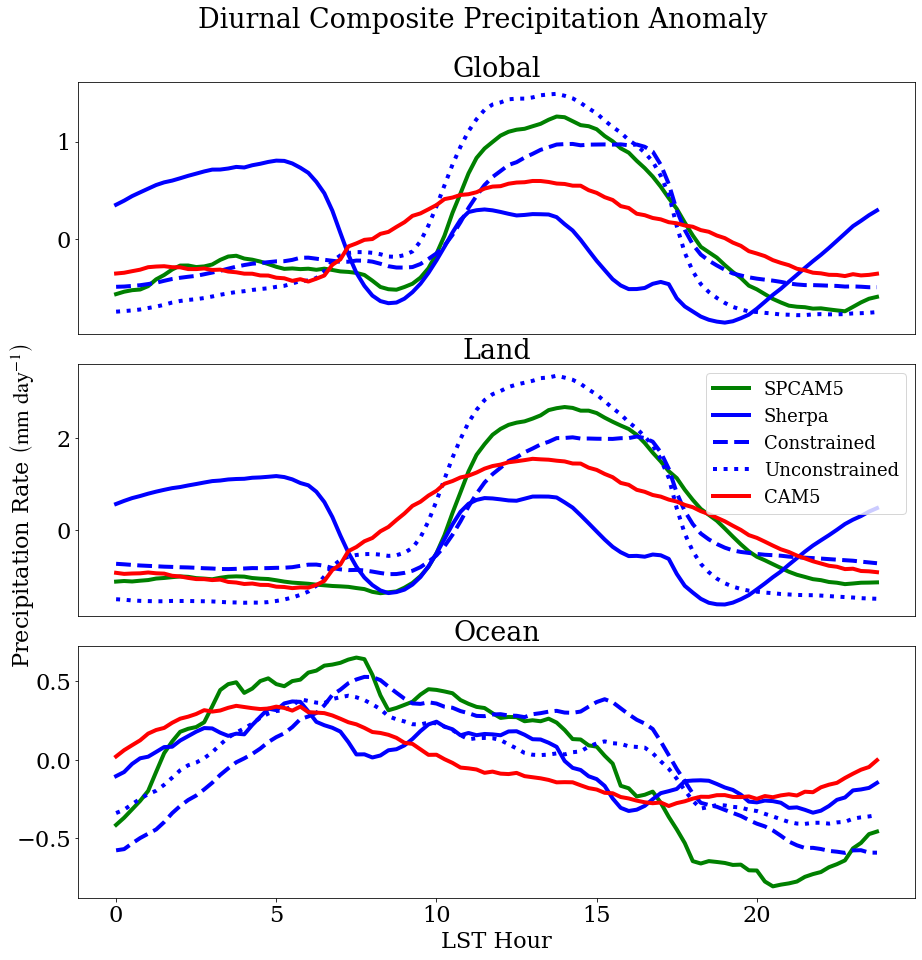

In [15]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,15)

ax[0].plot(timing, global_anon_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[0].plot(timing, global_anon_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[0].plot(timing, global_anon_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[0].plot(timing, global_anon_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[0].plot(timing, global_anon_lst_precip_CAM_composite, color="r", label="CAM5")
ax[0].set_ylabel("Precipitation Rate "+ r'$\left(\mathrm{mm \ day^{-1}}\right)$')
ax[0].yaxis.set_label_coords(-0.05,-0.68)
ax[0].set_xticks([])
ax[0].set_title("Global")


ax[1].plot(timing, land_anon_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[1].plot(timing, land_anon_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[1].plot(timing, land_anon_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[1].plot(timing, land_anon_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[1].plot(timing, land_anon_lst_precip_CAM_composite, color="r", label="CAM5")
ax[1].set_title("Land")
ax[1].set_xticks([])
ax[1].legend(fontsize=fz*0.8)

ax[2].plot(timing, ocean_anon_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[2].plot(timing, ocean_anon_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[2].plot(timing, ocean_anon_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[2].plot(timing, ocean_anon_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[2].plot(timing, ocean_anon_lst_precip_CAM_composite, color="r", label="CAM5")
ax[2].set_title("Ocean")
ax[2].set_xlabel("LST Hour")

#ax.legend(fontsize=fz*0.8)
#ax.set_ylim(-2.75,2.75)

plt.suptitle("Diurnal Composite Precipitation Anomaly", y=0.95)
plt.subplots_adjust(hspace=0.12)

#plt.savefig("Test_Figures/Anon_All_Precip_UnMasked_Annual.png")
#plt.savefig("Test_Figures/Anon_All_Precip_UnMasked_Annual.pdf")

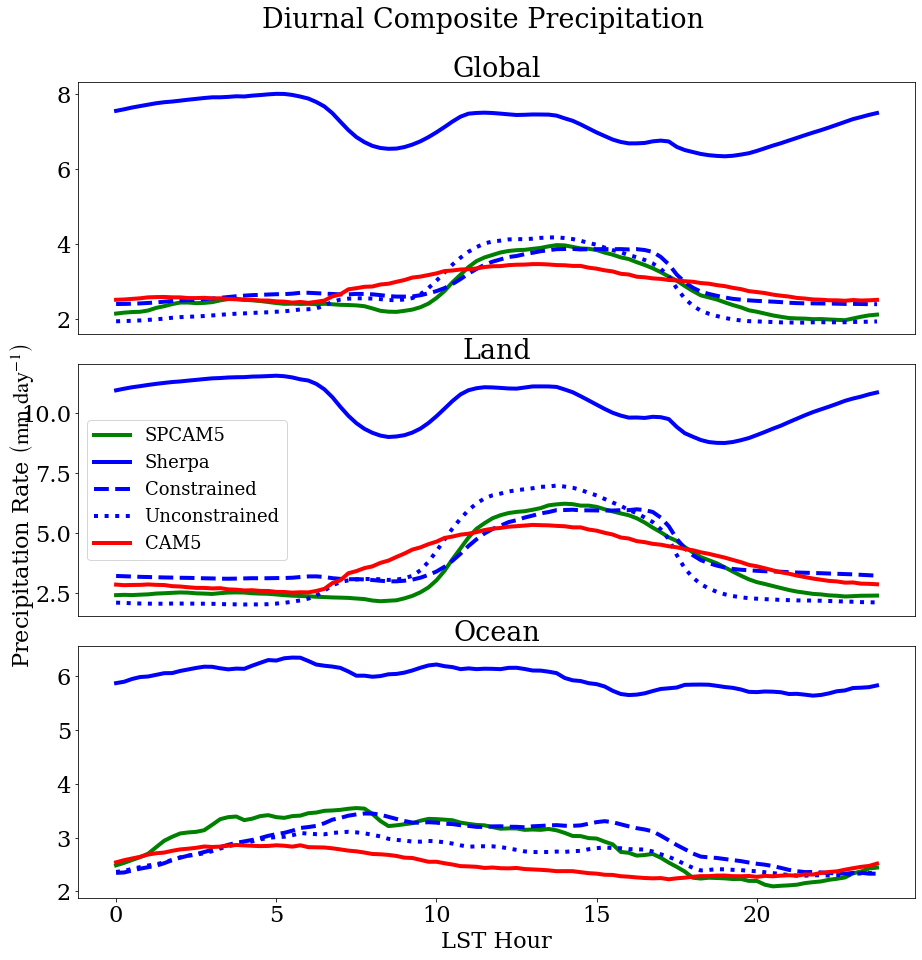

In [16]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,15)

ax[0].plot(timing, global_final_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[0].plot(timing, global_final_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[0].plot(timing, global_final_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[0].plot(timing, global_final_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[0].plot(timing, global_final_lst_precip_CAM_composite, color="r", label="CAM5")
ax[0].set_ylabel("Precipitation Rate "+ r'$\left(\mathrm{mm \ day^{-1}}\right)$')
ax[0].yaxis.set_label_coords(-0.05,-0.68)
ax[0].set_xticks([])
ax[0].set_title("Global")


ax[1].plot(timing, land_final_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[1].plot(timing, land_final_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[1].plot(timing, land_final_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[1].plot(timing, land_final_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[1].plot(timing, land_final_lst_precip_CAM_composite, color="r", label="CAM5")
ax[1].set_title("Land")
ax[1].set_xticks([])
ax[1].legend(fontsize=fz*0.8)

ax[2].plot(timing, ocean_final_lst_precip_SPCAM5_composite, color = "g", label="SPCAM5")
ax[2].plot(timing, ocean_final_lst_precip_SHERPA_composite, color = "b", label="Sherpa")
ax[2].plot(timing, ocean_final_lst_precip_CONSTRAINED_composite, color="b", linestyle='--', label="Constrained")
ax[2].plot(timing, ocean_final_lst_precip_UNCONSTRAINED_composite, color="b", linestyle=':', label="Unconstrained")
ax[2].plot(timing, ocean_final_lst_precip_CAM_composite, color="r", label="CAM5")
ax[2].set_title("Ocean")
ax[2].set_xlabel("LST Hour")

#ax.legend(fontsize=fz*0.8)
#ax.set_ylim(-2.75,2.75)

plt.suptitle("Diurnal Composite Precipitation", y=0.95)
plt.subplots_adjust(hspace=0.12)

#plt.savefig("Test_Figures/All_Precip_UnMasked_Annual.png")
#plt.savefig("Test_Figures/All_Precip_UnMasked_Annual.pdf")